# Intro:
 
Cryptocurrency represents a relatively new and distinct form of currency that shares some similarities with both fiat money and commodity money, yet also possesses unique characteristics due to its digital and decentralized nature. Let's explore how cryptocurrency compares to these traditional forms of money:

## Similarities to Commodity Money:

Limited Supply: Like commodity money, many cryptocurrencies have a predefined maximum supply. For example, Bitcoin has a fixed supply of 21 million coins, which is meant to mimic the scarcity aspect of commodities.

Decentralization: Cryptocurrencies often operate on decentralized networks, which means they are not controlled by a single entity (like a central bank). This is reminiscent of the decentralized nature of commodity money.

## Differences from Commodity Money:

Intrinsic Value: Unlike commodity money, cryptocurrencies do not have intrinsic value. Their value is largely driven by market demand, supply dynamics, and speculative trading. They lack a physical backing or direct linkage to a tangible commodity.

Digital Nature: Cryptocurrencies are purely digital assets that exist in the form of code on distributed ledgers (blockchains). They lack the physical presence associated with commodity money.

## Similarities to Fiat Money:

Trust-Based Value: Similar to fiat money, the value of cryptocurrencies is largely based on trust and belief in their utility, security, and potential for adoption.

Acceptance as Medium of Exchange: Cryptocurrencies are accepted as a medium of exchange in various transactions and can be used for online purchases, investment, remittances, and more, akin to how fiat money is used.

Government Independence: Just as fiat money can exist independently of a commodity backing, cryptocurrencies operate independently of governmental control. They are not issued or regulated by any central authority.

## Differences from Fiat Money:

Decentralization: While both cryptocurrencies and fiat money can be decentralized in their operation (e.g., through distributed ledger technology), most fiat money is still ultimately managed by central banks or governments, whereas cryptocurrencies operate on decentralized networks.

Volatility: Cryptocurrencies tend to exhibit much higher price volatility compared to most fiat currencies. This volatility can be a result of speculative trading, market sentiment, and relatively small market sizes.

In essence, cryptocurrencies combine certain aspects of both commodity money and fiat money while introducing their own unique features. They are digital assets that rely on decentralized technology and market demand for their value. The lack of intrinsic value and the presence of extreme price volatility distinguish cryptocurrencies from traditional forms of money. Their role in the global economy and financial landscape continues to evolve as they gain wider acceptance and use cases.

# `EDA` (Exploratory Data Analysis)

Debes realizar un análisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gráfico empleado y análisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook será un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en sí mismo.

En esta línea, hay varios aspectos indispensables que **deben** ser abordados en cualquier Análisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: 

### *búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados*. 

Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

***En caso de hacer uso de librerías como pandas_profiling, es indispensable acompañar los gráficos con análisis propios.***

## 📚 Libreries:

In [1]:
import requests
import pandas as pd
import seaborn as sns
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time  # Import the time module

## 🔌 [API CoinGecko](https://www.coingecko.com/es/api/documentation): conection 

### 🌎📰 Trending top 7:
Top-7 trending coins on CoinGecko as searched by users in the last 24 hours (Ordered by most popular first).

In [2]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/search/trending"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_trends = response.json()
        coins_data_global_trends = global_trends.get('coins', [])  # Extract coins data
        
        coins_global_trends = pd.DataFrame([item['item'] for item in coins_data_global_trends])  # Create DataFrame for coins
        
        return coins_global_trends
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coins_global_trends = get_coin_list()
    if coins_global_trends is not None:
        print("Coins DataFrame:")
        print(coins_global_trends)



Coins DataFrame:
              id  coin_id       name  symbol  market_cap_rank  \
0        apecoin    24383    ApeCoin     APE               68   
1        opulous    16548    Opulous    OPUL              652   
2            fsn     2515     FUSION     FSN              748   
3    sei-network    28205        Sei     SEI              119   
4        bitrock    30987    Bitrock   BROCK              745   
5         unibot    30462     Unibot  UNIBOT              210   
6       arbitrum    16547   Arbitrum     ARB               39   
7  worldcoin-wld    31069  Worldcoin     WLD              165   

                                               thumb  \
0  https://assets.coingecko.com/coins/images/2438...   
1  https://assets.coingecko.com/coins/images/1654...   
2  https://assets.coingecko.com/coins/images/2515...   
3  https://assets.coingecko.com/coins/images/2820...   
4  https://assets.coingecko.com/coins/images/3098...   
5  https://assets.coingecko.com/coins/images/3046...   
6  ht

In [3]:
coins_global_trends = coins_global_trends.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(coins_global_trends)

              id  coin_id       name  symbol  market_cap_rank  \
0        apecoin    24383    apecoin     ape               68   
1        opulous    16548    opulous    opul              652   
2            fsn     2515     fusion     fsn              748   
3    sei-network    28205        sei     sei              119   
4        bitrock    30987    bitrock   brock              745   
5         unibot    30462     unibot  unibot              210   
6       arbitrum    16547   arbitrum     arb               39   
7  worldcoin-wld    31069  worldcoin     wld              165   

                                               thumb  \
0  https://assets.coingecko.com/coins/images/2438...   
1  https://assets.coingecko.com/coins/images/1654...   
2  https://assets.coingecko.com/coins/images/2515...   
3  https://assets.coingecko.com/coins/images/2820...   
4  https://assets.coingecko.com/coins/images/3098...   
5  https://assets.coingecko.com/coins/images/3046...   
6  https://assets.coin

In [4]:
coins_global_trends.head(10)

,id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,apecoin,24383,apecoin,ape,68,https://assets.coingecko.com/coins/images/2438...,https://assets.coingecko.com/coins/images/2438...,https://assets.coingecko.com/coins/images/2438...,apecoin,0.000057,0
1,opulous,16548,opulous,opul,652,https://assets.coingecko.com/coins/images/1654...,https://assets.coingecko.com/coins/images/1654...,https://assets.coingecko.com/coins/images/1654...,opulous,0.000003,1
2,fsn,2515,fusion,fsn,748,https://assets.coingecko.com/coins/images/2515...,https://assets.coingecko.com/coins/images/2515...,https://assets.coingecko.com/coins/images/2515...,fusion,0.000008,2
3,sei-network,28205,sei,sei,119,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,sei,0.000006,3
4,bitrock,30987,bitrock,brock,745,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,bitrock,0.000006,4
5,unibot,30462,unibot,unibot,210,https://assets.coingecko.com/coins/images/3046...,https://assets.coingecko.com/coins/images/3046...,https://assets.coingecko.com/coins/images/3046...,unibot,0.004799,5
6,arbitrum,16547,arbitrum,arb,39,https://assets.coingecko.com/coins/images/1654...,https://assets.coingecko.com/coins/images/1654...,https://assets.coingecko.com/coins/images/1654...,arbitrum,0.000037,6
7,worldcoin-wld,31069,worldcoin,wld,165,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,worldcoin,0.000055,7


In [5]:
list_rank = coins_global_trends['symbol'].tolist()

In [6]:
coins_global_trends.rename(columns={'id': 'crip_id'}, inplace=True)

#### Guardo csv: coins_global_trends.csv

In [7]:
coins_global_trends.to_csv('../Csvs_cleanned/coins_global_trends.csv', index=False, mode='w',header=True)

In [8]:
list_rank

['ape', 'opul', 'fsn', 'sei', 'brock', 'unibot', 'arb', 'wld']

_____________________________________________________________

### 🌎📊  Global data:
Get global data - total_volume, total_market_cap, ongoing icos etc

#### Conection:

In [9]:

def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_data = response.json()
        list_of_global_data = pd.DataFrame(global_data)
        return list_of_global_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_data = get_coin_list()
    if list_of_global_data is not None:
        print(list_of_global_data)

                                                                                   data
active_cryptocurrencies                                                           10135
ended_icos                                                                         3376
market_cap_change_percentage_24h_usd                                          -1.027011
market_cap_percentage                 {'btc': 46.557419177904144, 'eth': 18.14989454...
markets                                                                             832
ongoing_icos                                                                         49
total_market_cap                      {'btc': 41808601.81622346, 'eth': 662583098.12...
total_volume                          {'btc': 1337321.1331611474, 'eth': 21193877.36...
upcoming_icos                                                                         0
updated_at                                                                   1692732846


#### Market_cap_percentage: %

In [10]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
market_cap_percentage_dict = list_of_global_data.at['market_cap_percentage', 'data']

# Crear un DataFrame a partir del diccionario
market_cap_percentage_df = pd.DataFrame(market_cap_percentage_dict.items(), columns=['crip_id', 'market_cap_percentage'])

# Imprimir el nuevo DataFrame
print(market_cap_percentage_df)


  crip_id  market_cap_percentage
0     btc              46.557419
1     eth              18.149895
2    usdt               7.656835
3     bnb               2.967622
4     xrp               2.503501
5    usdc               2.391853
6   steth               1.256712
7     ada               0.824778
8    doge               0.805756
9     sol               0.762850


#### Market_cap: $

In [11]:
total_market_cap_dict = list_of_global_data.at['total_market_cap', 'data']

# Crear un DataFrame a partir del diccionario
total_market_cap_df = pd.DataFrame(total_market_cap_dict.items(), columns=['crip_id', 'total_market_cap'])

# Imprimir el nuevo DataFrame
print(total_market_cap_df)

   crip_id  total_market_cap
0      btc      4.180860e+07
1      eth      6.625831e+08
2      ltc      1.677619e+10
3      bch      5.897705e+09
4      bnb      5.185562e+09
..     ...               ...
56     xdr      8.134435e+11
57     xag      4.622294e+10
58     xau      5.702311e+08
59    bits      4.180860e+13
60    sats      4.180860e+15

[61 rows x 2 columns]


#### Total_volume: $

In [12]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
total_volume_dict = list_of_global_data.at['total_volume', 'data']

# Crear un DataFrame a partir del diccionario
total_volume_df = pd.DataFrame(total_volume_dict.items(), columns=['crip_id', 'total_volume'])

# Imprimir el nuevo DataFrame
print(total_volume_df)

   crip_id  total_volume
0      btc  1.337321e+06
1      eth  2.119388e+07
2      ltc  5.366156e+08
3      bch  1.886484e+08
4      bnb  1.658693e+08
..     ...           ...
56     xdr  2.601941e+10
57     xag  1.478521e+09
58     xau  1.823984e+07
59    bits  1.337321e+12
60    sats  1.337321e+14

[61 rows x 2 columns]


#### Merged:

In [13]:
merged_df = market_cap_percentage_df.merge(total_market_cap_df, on='crip_id').merge(total_volume_df, on='crip_id')
merged_df = merged_df.sort_values(by=['market_cap_percentage', 'total_volume'], ascending=[False, False])

print(merged_df)


  crip_id  market_cap_percentage  total_market_cap  total_volume
0     btc              46.557419      4.180860e+07  1.337321e+06
1     eth              18.149895      6.625831e+08  2.119388e+07
2     bnb               2.967622      5.185562e+09  1.658693e+08
3     xrp               2.503501      2.111788e+12  6.754921e+10


#### Guardo csv: tops_criptos.csv

In [14]:
merged_df.to_csv('../Csvs_cleanned/top_criptos.csv', index=False, mode='w',header=True)

#### Combinacion, listado de codigos en los listados recientemente importados:

In [15]:
lista_coins0 = merged_df['crip_id'].tolist()
lista_coins1 = market_cap_percentage_df['crip_id'].tolist()
lista_coins2 = total_market_cap_df['crip_id'].tolist()
lista_coins3 = total_volume_df['crip_id'].tolist()

In [16]:
complete_list = lista_coins0 + lista_coins1 + list_rank #+ lista_coins2 + lista_coins3
complete_list = list(set(complete_list)) #quitar duplicados

##### Listado completo de ids a buscar como los mas recomendados en base a marketcap y total volume de cada cripto. HOY, YA!, AHORA!.

In [17]:
len(complete_list)

18

In [18]:
complete_list_lower = [item.lower() if isinstance(item, str) else item for item in complete_list]


In [19]:
complete_list_lower

['arb',
 'eth',
 'usdc',
 'usdt',
 'bnb',
 'ape',
 'ada',
 'opul',
 'fsn',
 'sei',
 'wld',
 'brock',
 'unibot',
 'doge',
 'btc',
 'sol',
 'xrp',
 'steth']

### 🪙📚 Listado de monedas: 

#### Importando listado de ids criptos API coingecko: Obteniendo el listado de ids anteriormente destacados, o al menos todos los que se encuentren disponibles en API

In [20]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/coins/list?include_platform=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_list = response.json()
        coin_id = pd.DataFrame(coin_list)
        return coin_id
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coin_id = get_coin_list()
    if coin_id is not None:
        print(coin_id)


                             id symbol                       name
0                        01coin    zoc                     01coin
1                        0chain    zcn                        Zus
2                 0vix-protocol    vix              0VIX Protocol
3                            0x    zrx                0x Protocol
4      0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract
...                         ...    ...                        ...
10130                 zyberswap    zyb                  Zyberswap
10131                  zynecoin    zyn                   Zynecoin
10132                   zynergy    zyn                    Zynergy
10133                       zyx    zyx                        ZYX
10134                       zzz    zzz                GoSleep ZZZ

[10135 rows x 3 columns]


In [21]:
coin_id.head(15)

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract
5,0x1-tools-ai-multi-tool,0x1,0x1.tools: AI Multi-tool
6,0xauto-io-contract-auto-deployer,0xa,0xAuto.io : Contract Auto Deployer
7,0xcoco,coco,0xCoco
8,0xdao,oxd,0xDAO
9,0xdao-v2,oxd v2,0xDAO V2


In [22]:
coin_id.shape

(10135, 3)

In [23]:
coin_id = coin_id.drop_duplicates()

#### Filtrado De las mas relevantes:

In [24]:
coin_id = coin_id[
    coin_id['symbol'].isin(complete_list) |
    coin_id['id'].isin(complete_list) |
    coin_id['name'].isin(complete_list)
]


In [25]:
coin_id.head(20)

,id,symbol,name
482,apecoin,ape,ApeCoin
488,apemove,ape,APEmove
547,arbitrum,arb,Arbitrum
553,arb-protocol,arb,ARB Protocol
1096,binancecoin,bnb,BNB
1097,binance-coin-wormhole,bnb,Binance Coin (Wormhole)
1103,binance-peg-cardano,ada,Binance-Peg Cardano
1104,binance-peg-dogecoin,doge,Binance-Peg Dogecoin
1112,binance-peg-xrp,xrp,Binance-Peg XRP
1151,bitcoin,btc,Bitcoin


In [26]:
coin_id.shape

(41, 3)

In [27]:
coin_id.rename(columns={'id': 'crip_id'}, inplace=True)

In [28]:
coin_id.isnull().sum()

crip_id    0
symbol     0
name       0
dtype: int64

In [29]:
coin_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 482 to 9731
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crip_id  41 non-null     object
 1   symbol   41 non-null     object
 2   name     41 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [30]:
coin_id['crip_id'] = coin_id['crip_id'].str.lower()
coin_id['symbol'] = coin_id['symbol'].str.lower()
coin_id['name'] = coin_id['name'].str.lower()

In [31]:

coin_id = coin_id.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(coin_id)

                                crip_id  symbol  \
482                             apecoin     ape   
488                             apemove     ape   
547                            arbitrum     arb   
553                        arb-protocol     arb   
1096                        binancecoin     bnb   
1097              binance-coin-wormhole     bnb   
1103                binance-peg-cardano     ada   
1104               binance-peg-dogecoin    doge   
1112                    binance-peg-xrp     xrp   
1151                            bitcoin     btc   
1219                            bitrock   brock   
1455               bridged-tether-linea    usdt   
1456            bridged-tether-stargate    usdt   
1460             bridged-usd-coin-linea    usdc   
1616                            cardano     ada   
2673                           dogecoin    doge   
2698                 doge-on-pulsechain    doge   
3097                           ethereum     eth   
3107                  ethereum-

In [32]:
coin_id = coin_id.reset_index(drop=True)

In [33]:
coin_id.head(10)

,crip_id,symbol,name
0,apecoin,ape,apecoin
1,apemove,ape,apemove
2,arbitrum,arb,arbitrum
3,arb-protocol,arb,arb protocol
4,binancecoin,bnb,bnb
5,binance-coin-wormhole,bnb,binance coin (wormhole)
6,binance-peg-cardano,ada,binance-peg cardano
7,binance-peg-dogecoin,doge,binance-peg dogecoin
8,binance-peg-xrp,xrp,binance-peg xrp
9,bitcoin,btc,bitcoin


In [34]:
coin_id.shape

(41, 3)

##### Guardo csv contenedor de info crip_ip:

In [35]:
coin_id.to_csv('../Csvs_cleanned/coin_id.csv', index=False, mode='w',header=True)

In [36]:
lista_coins1 = coin_id['crip_id'].tolist()
lista_coins2 = coin_id['symbol'].tolist()
lista_coins3 = coin_id['name'].tolist()


In [37]:
lista_coins =  lista_coins1 + lista_coins2 + lista_coins3

In [38]:
lista_coins = list(set(lista_coins))

#### Guardo lista de las mas importantes. para ser luego utilizadas por los demas codigos.

In [39]:
len(lista_coins)

80

In [40]:
lista_coins

['opulous',
 'tether',
 'bitcoin',
 'opul',
 'ethereum',
 'staked-ether',
 'apecoin',
 'cardano',
 'ethereum (wormhole)',
 'arb-protocol',
 'arb protocol',
 'bitrock',
 'heco-peg-xrp',
 'force-bridge-usdc',
 'heco-peg-bnb',
 'binancecoin',
 'dogecoin',
 'sol',
 'bnb',
 'usd-coin',
 'brock',
 'harrypotterobamapacman8inu',
 'arb',
 'bridged tether (linea)',
 'bridged usd coin (force bridge)',
 'binance-peg-cardano',
 'wrapped-solana',
 'xrp',
 'sol-wormhole',
 'binance coin (wormhole)',
 'worldcoin-wld',
 'doge on pulsechain',
 'binance-peg dogecoin',
 'usd coin',
 'fusion',
 'wrapped solana',
 'binance-coin-wormhole',
 'sol (wormhole)',
 'eth',
 'bridged usd coin (pulsechain)',
 'heco-peg xrp',
 'bridged usd coin (avalanche)',
 'tether-pulsechain',
 'usd-coin-pulsechain',
 'bridged tether (pulsechain)',
 'sei-network',
 'doge-on-pulsechain',
 'fsn',
 'worldcoin',
 'warioxrpdumbledoreyugioh69inu',
 'lido staked ether',
 'doge',
 'solana',
 'heco-peg binance coin',
 'usd-coin-avalanche-br

#### Producto: lista_coins

##### Agregado de alguunas que si o si queremos que esten

In [41]:
# Agregar dos elementos adicionales a la lista . elementos que si o si quiero que figuren,
lista_coins.append("ethereum")
lista_coins.append("bitcoin")

# Imprimir la lista actualizada
print(lista_coins)


['opulous', 'tether', 'bitcoin', 'opul', 'ethereum', 'staked-ether', 'apecoin', 'cardano', 'ethereum (wormhole)', 'arb-protocol', 'arb protocol', 'bitrock', 'heco-peg-xrp', 'force-bridge-usdc', 'heco-peg-bnb', 'binancecoin', 'dogecoin', 'sol', 'bnb', 'usd-coin', 'brock', 'harrypotterobamapacman8inu', 'arb', 'bridged tether (linea)', 'bridged usd coin (force bridge)', 'binance-peg-cardano', 'wrapped-solana', 'xrp', 'sol-wormhole', 'binance coin (wormhole)', 'worldcoin-wld', 'doge on pulsechain', 'binance-peg dogecoin', 'usd coin', 'fusion', 'wrapped solana', 'binance-coin-wormhole', 'sol (wormhole)', 'eth', 'bridged usd coin (pulsechain)', 'heco-peg xrp', 'bridged usd coin (avalanche)', 'tether-pulsechain', 'usd-coin-pulsechain', 'bridged tether (pulsechain)', 'sei-network', 'doge-on-pulsechain', 'fsn', 'worldcoin', 'warioxrpdumbledoreyugioh69inu', 'lido staked ether', 'doge', 'solana', 'heco-peg binance coin', 'usd-coin-avalanche-bridged-usdc-e', 'ape', 'bridged-tether-linea', 'usdt', 

##### Cantidad de coins a obtener informacion:

In [42]:
print(len(lista_coins))

82


###  Listado ids coingecko + info general, ranking .. posee info MUY IMPORTANTE https://api.coingecko.com/api/v3/coins/bitcoin?tickers=false&market_data=false&community_data=false&developer_data=false&sparkline=false

tarda aprox 9 minutos, api limitation for lot of request , have to wait at #429

In [43]:
list_of_coins_id_resume = pd.DataFrame()

def get_coin_id_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}?tickers=false&market_data=false&community_data=false&developer_data=false&sparkline=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_data = response.json()
        coin_id = pd.DataFrame({"crip_id": [crip_id]})
        
        for key, value in coin_data.items():
            if isinstance(value, (int, float, str)):
                coin_id[key] = [value]
        
        return coin_id
    else:
        print(f"Error en la solicitud: Listado de monedas {crip_id}", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_id_list(crip_id)

if __name__ == "__main__":
    
    for crip_id in lista_coins:
        coin_id = get_coin_id_list(crip_id)
        if coin_id is not None:
            list_of_coins_id_resume = pd.concat([list_of_coins_id_resume, coin_id], ignore_index=True)



Error en la solicitud: Listado de monedas opul 404
Error en la solicitud: Listado de monedas ethereum (wormhole) 404
Error en la solicitud: Listado de monedas arb protocol 404
Error en la solicitud: Listado de monedas heco-peg-xrp 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud: Listado de monedas sol 404
Error en la solicitud: Listado de monedas bnb 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud: Listado de monedas bnb 404
Error en la solicitud: Listado de monedas brock 404
Error en la solicitud: Listado de monedas arb 404
Error en la solicitud: Listado de monedas bridged tether (linea) 404
Error en la solicitud: Listado de monedas bridged usd coin (force bridge) 404
Error en la solicitud: Listado de monedas xrp 404
Error en la solicitud: Listado de monedas binance coin (wormhole) 404
Error en la solicitud: Listado

In [44]:
list_of_coins_id_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crip_id                          44 non-null     object 
 1   id                               44 non-null     object 
 2   symbol                           44 non-null     object 
 3   name                             44 non-null     object 
 4   asset_platform_id                33 non-null     object 
 5   block_time_in_minutes            44 non-null     int64  
 6   country_origin                   44 non-null     object 
 7   contract_address                 33 non-null     object 
 8   sentiment_votes_up_percentage    25 non-null     float64
 9   sentiment_votes_down_percentage  25 non-null     float64
 10  watchlist_portfolio_users        44 non-null     int64  
 11  market_cap_rank                  23 non-null     float64
 12  coingecko_rank          

In [45]:
list_of_coins_id_resume.head(20)

,crip_id,id,symbol,name,asset_platform_id,block_time_in_minutes,country_origin,contract_address,sentiment_votes_up_percentage,sentiment_votes_down_percentage,...,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,public_notice,hashing_algorithm,genesis_date
0,opulous,opulous,opul,Opulous,ethereum,0,,0x80d55c03180349fff4a229102f62328220a96444,97.66,2.34,...,1371.0,18.571,0.000,9.474,21.457,0.002,2023-08-22T19:39:55.305Z,NaN,NaN,NaN
1,tether,tether,usdt,Tether,ethereum,0,,0xdac17f958d2ee523a2206206994597c13d831ec7,31.25,68.75,...,150.0,41.416,0.000,10.685,101.651,0.029,2023-08-22T19:40:00.431Z,Tether announced the ending of the support of ...,NaN,NaN
2,bitcoin,bitcoin,btc,Bitcoin,NaN,10,,NaN,65.95,34.05,...,1.0,83.151,99.241,83.341,100.011,0.073,2023-08-22T19:40:06.039Z,NaN,SHA-256,2009-01-03
3,ethereum,ethereum,eth,Ethereum,NaN,0,,NaN,57.25,42.75,...,2.0,78.783,97.494,72.746,95.183,0.236,2023-08-22T19:39:25.497Z,NaN,Ethash,2015-07-30
4,staked-ether,staked-ether,steth,Lido Staked Ether,ethereum,0,,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,50.00,50.00,...,253.0,34.763,0.000,33.667,52.515,0.023,2023-08-22T19:39:57.913Z,NaN,NaN,NaN
5,apecoin,apecoin,ape,ApeCoin,ethereum,0,,0x4d224452801aced8b2f0aebe155379bb5d594381,47.44,52.56,...,310.0,32.451,0.000,10.909,70.167,0.009,2023-08-22T19:40:02.890Z,NaN,NaN,NaN
6,cardano,cardano,ada,Cardano,NaN,0,,NaN,70.19,29.81,...,7.0,62.536,70.270,58.753,72.124,0.023,2023-08-22T19:39:28.582Z,NaN,NaN,NaN
7,arb-protocol,arb-protocol,arb,ARB Protocol,solana,0,,9tzZzEHsKnwFL1A3DyFJwj36KnZj3gZ7g4srWp9YTEoh,100.00,0.00,...,6172.0,1.624,0.000,6.473,1.000,0.000,2023-08-22T19:40:09.065Z,NaN,NaN,NaN
8,bitrock,bitrock,brock,Bitrock,ethereum,0,,0xde67d97b8770dc98c746a3fc0093c538666eb493,98.39,1.61,...,NaN,0.000,0.000,0.000,0.000,0.000,2023-08-22T19:40:10.931Z,NaN,NaN,NaN
9,heco-peg-xrp,heco-peg-xrp,xrp,Heco-Peg XRP,huobi-token,0,,0xa2f3c2446a3e20049708838a779ff8782ce6645a,NaN,NaN,...,6573.0,0.201,0.000,0.000,1.000,0.022,2023-08-22T19:39:28.028Z,NaN,NaN,NaN


In [46]:
columns_to_drop = ['id', 'symbol', 'name', 'country_origin', 'contract_address','hashing_algorithm','genesis_date']
list_of_coins_id_resume.drop(columns=columns_to_drop, inplace=True)

In [47]:
list_of_coins_id_resume['last_updated'] = pd.to_datetime(list_of_coins_id_resume['last_updated'])


In [48]:
list_of_coins_id_resume = list_of_coins_id_resume.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(list_of_coins_id_resume.head())

        crip_id asset_platform_id  block_time_in_minutes  \
0       opulous          ethereum                      0   
1        tether          ethereum                      0   
2       bitcoin               NaN                     10   
3      ethereum               NaN                      0   
4  staked-ether          ethereum                      0   

   sentiment_votes_up_percentage  sentiment_votes_down_percentage  \
0                          97.66                             2.34   
1                          31.25                            68.75   
2                          65.95                            34.05   
3                          57.25                            42.75   
4                          50.00                            50.00   

   watchlist_portfolio_users  market_cap_rank  coingecko_rank  \
0                      27801            653.0          1371.0   
1                     284137              3.0           150.0   
2                    1331507 

In [49]:
list_of_coins_id_resume.head()

,crip_id,asset_platform_id,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,public_notice
0,opulous,ethereum,0,97.66,2.34,27801,653.0,1371.0,18.571,0.000,9.474,21.457,0.002,2023-08-22 19:39:55.305000+00:00,NaN
1,tether,ethereum,0,31.25,68.75,284137,3.0,150.0,41.416,0.000,10.685,101.651,0.029,2023-08-22 19:40:00.431000+00:00,tether announced the ending of the support of ...
2,bitcoin,NaN,10,65.95,34.05,1331507,1.0,1.0,83.151,99.241,83.341,100.011,0.073,2023-08-22 19:40:06.039000+00:00,NaN
3,ethereum,NaN,0,57.25,42.75,1193699,2.0,2.0,78.783,97.494,72.746,95.183,0.236,2023-08-22 19:39:25.497000+00:00,NaN
4,staked-ether,ethereum,0,50.00,50.00,13094,7.0,253.0,34.763,0.000,33.667,52.515,0.023,2023-08-22 19:39:57.913000+00:00,NaN


In [50]:
list_of_coins_id_resume.shape

(44, 15)

##### Guardo csv ranking_coingecko:

In [51]:
list_of_coins_id_resume.to_csv('../Csvs_cleanned/ranking_coingecko.csv', index=False , mode= 'w',header=True)

In [52]:
# Obtener valores únicos de la columna 'crip_id'
lista_coins = list_of_coins_id_resume['crip_id'].unique().tolist()

# Agregar dos elementos adicionales a la lista . elementos que si o si quiero que figuren,
lista_coins.append("ethereum")
lista_coins.append("bitcoin")

# Imprimir la lista actualizada
print(lista_coins)


['opulous', 'tether', 'bitcoin', 'ethereum', 'staked-ether', 'apecoin', 'cardano', 'arb-protocol', 'bitrock', 'heco-peg-xrp', 'force-bridge-usdc', 'heco-peg-bnb', 'binancecoin', 'dogecoin', 'usd-coin', 'harrypotterobamapacman8inu', 'binance-peg-cardano', 'wrapped-solana', 'sol-wormhole', 'worldcoin-wld', 'binance-coin-wormhole', 'tether-pulsechain', 'usd-coin-pulsechain', 'sei-network', 'doge-on-pulsechain', 'fsn', 'worldcoin', 'warioxrpdumbledoreyugioh69inu', 'solana', 'usd-coin-avalanche-bridged-usdc-e', 'bridged-tether-linea', 'arbitrum', 'wlitidao', 'binance-peg-xrp', 'apemove', 'bridged-usd-coin-linea', 'binance-peg-dogecoin', 'bridged-tether-stargate', 'ethereum-wormhole', 'oec-binance-coin', 'unibot', 'ripple', 'ethereum', 'bitcoin']


### 📊 Listado de precios, market caps y total volumes: 163 [dias]... por ahora..
luego podria agregar hourly...
+ datos

hacer que guarde toda la data en un dataframe

In [53]:
day_interval = 163
list_of_coins_resume = pd.DataFrame()

def get_coin_list_of_prices(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/market_chart?vs_currency=usd&days={day_interval}&interval=daily&precision=5"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_price_list = response.json()
        list_of_prices = pd.DataFrame(coin_price_list)
        return list_of_prices
    else:
        print(f"Error en la solicitud para {crip_id}: {response.status_code}")
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_list_of_prices(crip_id) # Reintentar error 429
        


if __name__ == "__main__":
    for crip_id in lista_coins:
        list_of_prices = get_coin_list_of_prices(crip_id)
        if list_of_prices is not None:
            list_of_prices['crip_id'] = crip_id
            list_of_coins_resume = pd.concat([list_of_coins_resume, list_of_prices], ignore_index=True)
        

    print(list_of_coins_resume)
    

Error en la solicitud para bitcoin: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud para bitrock: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud para tether-pulsechain: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud para wlitidao: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
                            prices                          market_caps  \
0         [1678665600000, 0.14786]   [1678665600000, 33683469.08886622]   
1         [1678752000000, 0.17164]  [1678752000000, 38958876.862450354]   
2         [1678838400000, 0.18581]   [1678838400000, 42926168.00941139]   
3         [1678924800000, 0.17029]     [1678924800000, 39010858.474326]   
4         [16790112000

In [54]:
print(list_of_coins_resume.tail(4))
print(list_of_coins_resume.head(4))
print(list_of_coins_resume.shape)

                            prices                          market_caps  \
5723  [1692489600000, 26104.77863]  [1692489600000, 508087686822.70435]   
5724  [1692576000000, 26160.70042]   [1692576000000, 509078930366.0949]   
5725  [1692662400000, 26119.00596]   [1692662400000, 508491920831.3545]   
5726  [1692733689000, 25856.40459]   [1692733689000, 503757420898.9904]   

                            total_volumes  crip_id  
5723  [1692489600000, 3355038748.9824667]  bitcoin  
5724   [1692576000000, 8304370131.833873]  bitcoin  
5725   [1692662400000, 9377753161.447634]  bitcoin  
5726   [1692733689000, 9642426116.741571]  bitcoin  
                     prices                          market_caps  \
0  [1678665600000, 0.14786]   [1678665600000, 33683469.08886622]   
1  [1678752000000, 0.17164]  [1678752000000, 38958876.862450354]   
2  [1678838400000, 0.18581]   [1678838400000, 42926168.00941139]   
3  [1678924800000, 0.17029]     [1678924800000, 39010858.474326]   

                  

In [55]:
list_of_coins_resume.head()

,prices,market_caps,total_volumes,crip_id
0,"[1678665600000, 0.14786]","[1678665600000, 33683469.08886622]","[1678665600000, 794042.0831352252]",opulous
1,"[1678752000000, 0.17164]","[1678752000000, 38958876.862450354]","[1678752000000, 1114396.233009487]",opulous
2,"[1678838400000, 0.18581]","[1678838400000, 42926168.00941139]","[1678838400000, 1617865.862023916]",opulous
3,"[1678924800000, 0.17029]","[1678924800000, 39010858.474326]","[1678924800000, 892111.3754610182]",opulous
4,"[1679011200000, 0.17763]","[1679011200000, 40900209.996707186]","[1679011200000, 677446.6399114956]",opulous


####  Extraer de las listas los valores necesarios

In [56]:
prices_list_ko = pd.DataFrame()
# print(type(list_of_coins_resume['prices'][1]))
# print(list_of_coins_resume['prices'][0])


# reestructuracion:
prices = pd.DataFrame()

prices['timestamp'] = list_of_coins_resume['prices'].apply(lambda lista: lista[0])
prices['price'] = list_of_coins_resume['prices'].apply(lambda lista: lista[1])
prices['market_cap'] = list_of_coins_resume['market_caps'].apply(lambda lista: lista[1])
prices['total_volume'] = list_of_coins_resume['total_volumes'].apply(lambda lista: lista[1])
prices['crip_id'] = list_of_coins_resume['crip_id']

In [57]:
prices = prices.drop_duplicates()

In [58]:
prices.shape

(5399, 5)

In [59]:

cantidad_valores_unicos = prices['crip_id'].nunique()
print(cantidad_valores_unicos)

42


In [60]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5399 entries, 0 to 5398
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     5399 non-null   int64  
 1   price         5399 non-null   float64
 2   market_cap    5399 non-null   float64
 3   total_volume  5399 non-null   float64
 4   crip_id       5399 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 253.1+ KB


In [61]:
# Convertir las columnas 'market_caps' y 'total_volumes' a tipo float32
prices['market_cap'] = prices['market_cap'].astype('float32')
prices['total_volume'] = prices['total_volume'].astype('float32')

In [62]:
# Reordeno
prices = prices[['crip_id','timestamp','price','market_cap','total_volume']]

In [63]:
prices.head()

,crip_id,timestamp,price,market_cap,total_volume
0,opulous,1678665600000,0.14786,33683468.0,7.940421e+05
1,opulous,1678752000000,0.17164,38958876.0,1.114396e+06
2,opulous,1678838400000,0.18581,42926168.0,1.617866e+06
3,opulous,1678924800000,0.17029,39010860.0,8.921114e+05
4,opulous,1679011200000,0.17763,40900208.0,6.774466e+05


In [64]:
prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')

##### Guardo csv prices:

In [65]:
prices.to_csv('../Csvs_cleanned/prices.csv', index=False, mode='w', header=True)

#### Prices_normalized:

In [66]:
# Inicializar el escalador Min-Max
scaler = MinMaxScaler()
prices_normalized = pd.DataFrame()
# Seleccionar columnas para normalizar y ajustar el escalador
columns_to_normalize = ['price', 'market_cap', 'total_volume']
prices_normalized[columns_to_normalize] = scaler.fit_transform(prices[columns_to_normalize])
prices_normalized['crip_id'] = prices['crip_id']
prices_normalized['timestamp'] = prices['timestamp']

In [67]:
prices_normalized = prices_normalized[['crip_id','timestamp','price','market_cap','total_volume']]
prices_normalized.head()

,crip_id,timestamp,price,market_cap,total_volume
0,opulous,2023-03-13,0.000005,0.000055,0.000009
1,opulous,2023-03-14,0.000005,0.000064,0.000013
2,opulous,2023-03-15,0.000006,0.000070,0.000018
3,opulous,2023-03-16,0.000005,0.000064,0.000010
4,opulous,2023-03-17,0.000006,0.000067,0.000008


##### Guardo prices_normalized.csv

In [68]:
prices_normalized.to_csv('../Csvs_cleanned/prices_normalized.csv', index=False, mode='w',header=True)

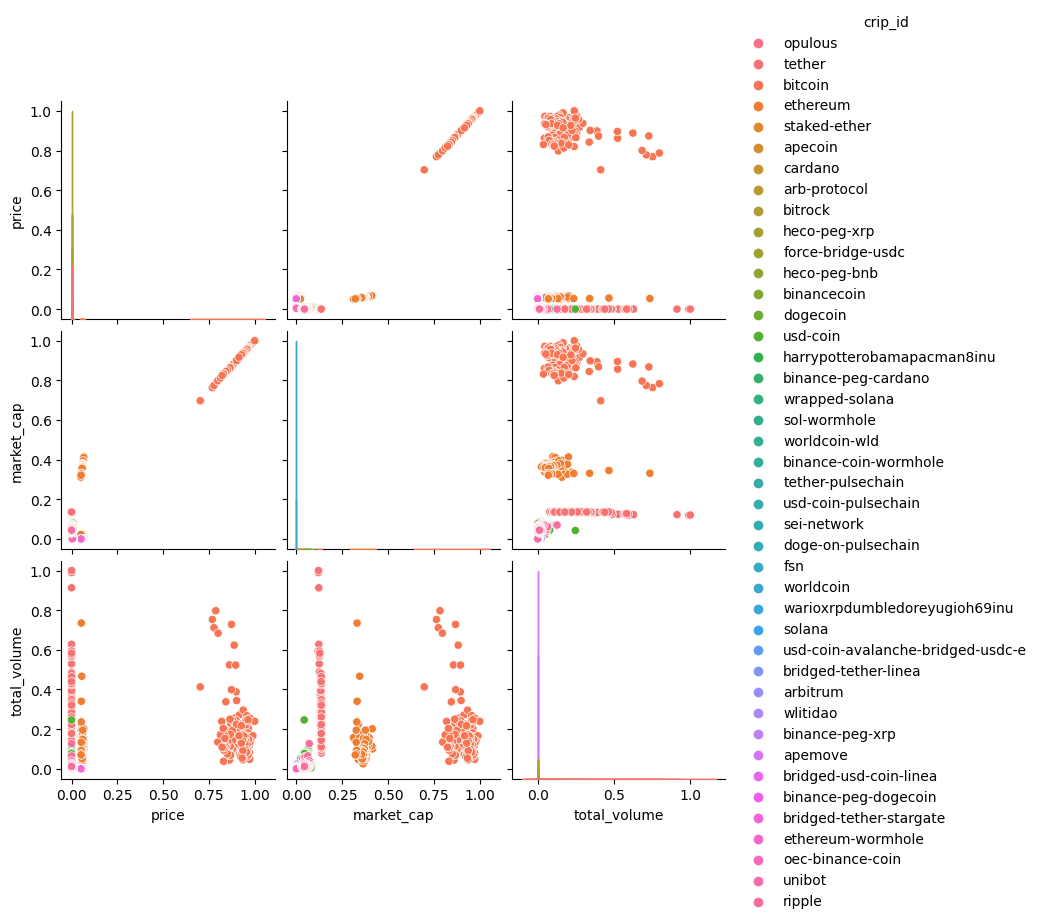

In [69]:
sns.pairplot(prices_normalized, hue = 'crip_id')

### 📈 OHLC of the currency
[
1594382400000 (time),
1.1 (open),
2.2 (high),
3.3 (low),
4.4 (close)
]

In [70]:
def get_coin_ohlc_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/ohlc?vs_currency=usd&days=30&precision=5"
        
    response = requests.get(url)
        
    if response.status_code == 200:
        list_of_ohlc = response.json()
        df = pd.DataFrame(list_of_ohlc, columns=["timestamp", "open_price", "high_price", "low_price", "close_price"])
        df["crip_id"] = crip_id
        return df
    else:
        print(f"Error en la solicitud: Datos OHLC de {crip_id}", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_ohlc_list(crip_id)

if __name__ == "__main__":
   
    list_of_ohlc_data = pd.DataFrame()

    for crip_id in lista_coins:
        ohlc_data = get_coin_ohlc_list(crip_id)
        if ohlc_data is not None:
            list_of_ohlc_data = pd.concat([list_of_ohlc_data, ohlc_data], ignore_index=True)



Error en la solicitud: Datos OHLC de heco-peg-xrp 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud: Datos OHLC de tether-pulsechain 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud: Datos OHLC de apemove 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...


In [71]:
list_of_ohlc_data = list_of_ohlc_data.drop_duplicates()

In [72]:
list_of_ohlc_data.isnull().sum()

timestamp      0
open_price     0
high_price     0
low_price      0
close_price    0
crip_id        0
dtype: int64

In [73]:
# No convierto a float32 porque altera demasiado el numero, necesito precicion en esta parte de los datos
print(list_of_ohlc_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6772 entries, 0 to 6771
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    6772 non-null   int64  
 1   open_price   6772 non-null   float64
 2   high_price   6772 non-null   float64
 3   low_price    6772 non-null   float64
 4   close_price  6772 non-null   float64
 5   crip_id      6772 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 370.3+ KB
None


In [74]:
list_of_ohlc_data.head()

,timestamp,open_price,high_price,low_price,close_price,crip_id
0,1690156800000,0.07493,0.07528,0.07475,0.07504,opulous
1,1690171200000,0.07491,0.07494,0.07480,0.07480,opulous
2,1690185600000,0.07537,0.07541,0.07502,0.07523,opulous
3,1690200000000,0.07511,0.07547,0.07511,0.07530,opulous
4,1690214400000,0.07540,0.07583,0.07540,0.07583,opulous


In [75]:
list_of_ohlc_data['timestamp'] = pd.to_datetime(list_of_ohlc_data['timestamp'], unit='ms')


In [76]:
unique_count = list_of_ohlc_data['crip_id'].nunique()
print(unique_count)


42


##### Guardo csv OHLC:

In [77]:
list_of_ohlc_data.to_csv('../Csvs_cleanned/ohlc_prices.csv', index=False, mode='w',header=True)

### 📃 tickers: Transacciones
Dionary:

last: latest unconverted price in the respective pair target currency

volume: unconverted 24h trading volume in the respective pair target currency

converted_last: latest converted price in BTC, ETH, and USD

converted_volume: converted 24h trading volume in BTC, ETH, and USD

Cache / Update Frequency: every 2 minutes

#### import data:

In [78]:


def get_coin_tickers(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/tickers"
        
    response = requests.get(url)
        
    if response.status_code == 200:
        ticker_data = response.json()
        return ticker_data
    else:
        print(f"Error en la solicitud de tickers {crip_id}:", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_tickers(coin_id)  # Reintentar la solicitud después de esperar
            
if __name__ == "__main__":
    tickers_resume = pd.DataFrame()

    for crip_id in lista_coins:
        ticker_data = get_coin_tickers(crip_id)
            
        if ticker_data is not None:
            tickers = ticker_data['tickers']
            
            for ticker in tickers:
                ticker['coin_id'] = crip_id
                
                # Crear un DataFrame a partir de los datos del ticker
                ticker_df = pd.DataFrame([ticker])
                tickers_resume = pd.concat([tickers_resume, ticker_df], ignore_index=True)

Error en la solicitud de tickers arb-protocol: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers dogecoin: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers binance-coin-wormhole: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers solana: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers bridged-tether-stargate: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...


In [79]:
pd.set_option('display.max_colwidth', None)

#### simple and mini ETL

In [80]:
tickers_resume.head(10)

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,OPUL,USDT,"{'name': 'KuCoin', 'identifier': 'kucoin', 'has_trading_incentive': False}",0.075240,1.890682e+06,"{'btc': 2.91e-06, 'eth': 4.616e-05, 'usd': 0.075217}","{'btc': 5.502457, 'eth': 87.28, 'usd': 142211}",green,0.516556,2023-08-22T19:52:01+00:00,2023-08-22T19:52:01+00:00,2023-08-22T19:52:01+00:00,False,False,https://www.kucoin.com/trade/OPUL-USDT,None,opulous,tether
1,OPUL,USDT,"{'name': 'BitMart', 'identifier': 'bitmart', 'has_trading_incentive': False}",0.075430,3.696710e+05,"{'btc': 2.92e-06, 'eth': 4.634e-05, 'usd': 0.075499}","{'btc': 1.07989, 'eth': 17.129122, 'usd': 27910}",green,1.065473,2023-08-22T19:52:04+00:00,2023-08-22T19:52:04+00:00,2023-08-22T19:52:04+00:00,False,False,https://www.bitmart.com/trade/en?layout=basic&symbol=OPUL_USDT,None,opulous,tether
2,OPUL,USDT,"{'name': 'Huobi', 'identifier': 'huobi', 'has_trading_incentive': False}",0.075400,2.626204e+05,"{'btc': 2.92e-06, 'eth': 4.632e-05, 'usd': 0.075409}","{'btc': 0.75418193, 'eth': 11.964504, 'usd': 19476.33}",green,0.398936,2023-08-22T19:44:33+00:00,2023-08-22T19:44:33+00:00,2023-08-22T19:53:58+00:00,False,False,https://www.huobi.com/en-us/exchange/opul_usdt,None,opulous,tether
3,OPUL,USDT,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",0.075276,3.156425e+06,"{'btc': 2.92e-06, 'eth': 4.624e-05, 'usd': 0.075345}","{'btc': 8.89331, 'eth': 141.065, 'usd': 229848}",green,0.524934,2023-08-22T19:52:57+00:00,2023-08-22T19:52:57+00:00,2023-08-22T19:52:57+00:00,False,False,https://gate.io/trade/OPUL_USDT,None,opulous,tether
4,OPUL,ETH,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",0.000046,7.863833e+04,"{'btc': 2.92e-06, 'eth': 4.628e-05, 'usd': 0.075402}","{'btc': 0.21596894, 'eth': 3.425682, 'usd': 5581.72}",green,1.594181,2023-08-22T19:52:57+00:00,2023-08-22T19:52:57+00:00,2023-08-22T19:52:57+00:00,False,False,https://gate.io/trade/OPUL_ETH,None,opulous,ethereum
5,OPUL,USDT,"{'name': 'MEXC', 'identifier': 'mxc', 'has_trading_incentive': False}",0.075250,7.410871e+05,"{'btc': 2.91e-06, 'eth': 4.623e-05, 'usd': 0.075319}","{'btc': 2.159711, 'eth': 34.257159, 'usd': 55818}",green,0.809341,2023-08-22T19:52:24+00:00,2023-08-22T19:52:24+00:00,2023-08-22T19:52:24+00:00,False,False,https://www.mexc.com/exchange/OPUL_USDT,None,opulous,tether
6,OPUL,USDT,"{'name': 'AscendEX (BitMax)', 'identifier': 'bitmax', 'has_trading_incentive': False}",0.076200,1.896505e+06,"{'btc': 2.95e-06, 'eth': 4.673e-05, 'usd': 0.076181}","{'btc': 5.589826, 'eth': 88.628, 'usd': 144478}",green,3.329065,2023-08-22T19:51:51+00:00,2023-08-22T19:51:51+00:00,2023-08-22T19:51:51+00:00,False,False,https://ascendex.com/en/cashtrade-spottrading/usdt/opul,None,opulous,tether
7,OPUL,USDT,"{'name': 'CoinEx', 'identifier': 'coinex', 'has_trading_incentive': False}",0.074744,8.880632e+04,"{'btc': 2.89e-06, 'eth': 4.592e-05, 'usd': 0.074753}","{'btc': 0.24972871, 'eth': 3.96175, 'usd': 6449.1}",green,0.55508,2023-08-22T19:53:56+00:00,2023-08-22T19:53:56+00:00,2023-08-22T19:53:56+00:00,False,False,https://www.coinex.com/trading?currency=USDT&dest=OPUL#limit,None,opulous,tether
8,OPUL,USDT,"{'name': 'Tarmex', 'identifier': 'tarmex', 'has_trading_incentive': False}",0.075860,5.998548e+04,"{'btc': 2.94e-06, 'eth': 4.659e-05, 'usd': 0.075862}","{'btc': 0.16726683, 'eth': 2.652342, 'usd': 4319.18}",green,0.48754,2023-08-22T19:54:09+00:00,2023-08-22T19:54:09+00:00,2023-08-22T19:54:09+00:00,False,False,https://tarmex.io/trade/OPUL_USDT,None,opulous,tether
9,0X80D55C03180349FFF4A229102F62328220A96444,0XA0B86991C6218B36C1D19D4A2E9EB0CE3606EB48,"{'name': 'Uniswap V2 (Ethereum)', 'identifier': 'uniswap_v2', 'has_trading_incentive': False}",0.076616,2.723416e+05,"{'btc': 2.97e-06, 'eth': 4.707e-05, 'usd': 0.076629}","{'btc': 0.78698588, 'eth': 12.48

In [81]:
# Filtrar y mostrar las filas con valores nulos
rows_with_nulls = tickers_resume[tickers_resume.isnull().any(axis=1)]
rows_with_nulls.head(15)
print(rows_with_nulls.shape)

(1747, 18)


In [82]:
tickers_resume['token_info_url'] = tickers_resume['token_info_url'].fillna('not founded token_info_url #404')
tickers_resume['trade_url'] = tickers_resume['trade_url'].fillna('not founded trade_url #404')

In [83]:
tickers_resume['target_coin_id'] = tickers_resume['target_coin_id'].fillna('USD')

In [84]:
tickers_resume.shape

(1756, 18)

In [85]:
tickers_resume.isnull().sum()

base                           0
target                         0
market                         0
last                           0
volume                         0
converted_last                 0
converted_volume               0
trust_score                  183
bid_ask_spread_percentage    148
timestamp                      0
last_traded_at                 0
last_fetch_at                  0
is_anomaly                     0
is_stale                       0
trade_url                      0
token_info_url                 0
coin_id                        0
target_coin_id                 0
dtype: int64

#### Timestamp

In [86]:
# Convertir el formato de timestamp a timestamp numérico y agregar al DataFrame
tickers_resume['timestamp'] = tickers_resume['timestamp'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
tickers_resume['last_traded_at'] = tickers_resume['last_traded_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
tickers_resume['last_fetch_at'] = tickers_resume['last_fetch_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)

In [87]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,OPUL,USDT,"{'name': 'KuCoin', 'identifier': 'kucoin', 'has_trading_incentive': False}",0.075240,1.890682e+06,"{'btc': 2.91e-06, 'eth': 4.616e-05, 'usd': 0.075217}","{'btc': 5.502457, 'eth': 87.28, 'usd': 142211}",green,0.516556,1692733921000,1692733921000,1692733921000,False,False,https://www.kucoin.com/trade/OPUL-USDT,not founded token_info_url #404,opulous,tether
1,OPUL,USDT,"{'name': 'BitMart', 'identifier': 'bitmart', 'has_trading_incentive': False}",0.075430,3.696710e+05,"{'btc': 2.92e-06, 'eth': 4.634e-05, 'usd': 0.075499}","{'btc': 1.07989, 'eth': 17.129122, 'usd': 27910}",green,1.065473,1692733924000,1692733924000,1692733924000,False,False,https://www.bitmart.com/trade/en?layout=basic&symbol=OPUL_USDT,not founded token_info_url #404,opulous,tether
2,OPUL,USDT,"{'name': 'Huobi', 'identifier': 'huobi', 'has_trading_incentive': False}",0.075400,2.626204e+05,"{'btc': 2.92e-06, 'eth': 4.632e-05, 'usd': 0.075409}","{'btc': 0.75418193, 'eth': 11.964504, 'usd': 19476.33}",green,0.398936,1692733473000,1692733473000,1692734038000,False,False,https://www.huobi.com/en-us/exchange/opul_usdt,not founded token_info_url #404,opulous,tether
3,OPUL,USDT,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",0.075276,3.156425e+06,"{'btc': 2.92e-06, 'eth': 4.624e-05, 'usd': 0.075345}","{'btc': 8.89331, 'eth': 141.065, 'usd': 229848}",green,0.524934,1692733977000,1692733977000,1692733977000,False,False,https://gate.io/trade/OPUL_USDT,not founded token_info_url #404,opulous,tether
4,OPUL,ETH,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",0.000046,7.863833e+04,"{'btc': 2.92e-06, 'eth': 4.628e-05, 'usd': 0.075402}","{'btc': 0.21596894, 'eth': 3.425682, 'usd': 5581.72}",green,1.594181,1692733977000,1692733977000,1692733977000,False,False,https://gate.io/trade/OPUL_ETH,not founded token_info_url #404,opulous,ethereum


#### market

In [88]:
tickers_resume['marketplace'] = tickers_resume['market'].apply(lambda x: x['name'])
tickers_resume['marketplace_id'] = tickers_resume['market'].apply(lambda x: x['identifier'])

In [89]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id
0,OPUL,USDT,"{'name': 'KuCoin', 'identifier': 'kucoin', 'has_trading_incentive': False}",0.075240,1.890682e+06,"{'btc': 2.91e-06, 'eth': 4.616e-05, 'usd': 0.075217}","{'btc': 5.502457, 'eth': 87.28, 'usd': 142211}",green,0.516556,1692733921000,1692733921000,1692733921000,False,False,https://www.kucoin.com/trade/OPUL-USDT,not founded token_info_url #404,opulous,tether,KuCoin,kucoin
1,OPUL,USDT,"{'name': 'BitMart', 'identifier': 'bitmart', 'has_trading_incentive': False}",0.075430,3.696710e+05,"{'btc': 2.92e-06, 'eth': 4.634e-05, 'usd': 0.075499}","{'btc': 1.07989, 'eth': 17.129122, 'usd': 27910}",green,1.065473,1692733924000,1692733924000,1692733924000,False,False,https://www.bitmart.com/trade/en?layout=basic&symbol=OPUL_USDT,not founded token_info_url #404,opulous,tether,BitMart,bitmart
2,OPUL,USDT,"{'name': 'Huobi', 'identifier': 'huobi', 'has_trading_incentive': False}",0.075400,2.626204e+05,"{'btc': 2.92e-06, 'eth': 4.632e-05, 'usd': 0.075409}","{'btc': 0.75418193, 'eth': 11.964504, 'usd': 19476.33}",green,0.398936,1692733473000,1692733473000,1692734038000,False,False,https://www.huobi.com/en-us/exchange/opul_usdt,not founded token_info_url #404,opulous,tether,Huobi,huobi
3,OPUL,USDT,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",0.075276,3.156425e+06,"{'btc': 2.92e-06, 'eth': 4.624e-05, 'usd': 0.075345}","{'btc': 8.89331, 'eth': 141.065, 'usd': 229848}",green,0.524934,1692733977000,1692733977000,1692733977000,False,False,https://gate.io/trade/OPUL_USDT,not founded token_info_url #404,opulous,tether,Gate.io,gate
4,OPUL,ETH,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",0.000046,7.863833e+04,"{'btc': 2.92e-06, 'eth': 4.628e-05, 'usd': 0.075402}","{'btc': 0.21596894, 'eth': 3.425682, 'usd': 5581.72}",green,1.594181,1692733977000,1692733977000,1692733977000,False,False,https://gate.io/trade/OPUL_ETH,not founded token_info_url #404,opulous,ethereum,Gate.io,gate


#### converted_last


In [90]:
tickers_resume['converted_last_btc'] = tickers_resume['converted_last'].apply(lambda x: x['btc'])
tickers_resume['converted_last_eth'] = tickers_resume['converted_last'].apply(lambda x: x['eth'])
tickers_resume['converted_last_usd'] = tickers_resume['converted_last'].apply(lambda x: x['usd'])

In [91]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756 entries, 0 to 1755
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       1756 non-null   object 
 1   target                     1756 non-null   object 
 2   market                     1756 non-null   object 
 3   last                       1756 non-null   float64
 4   volume                     1756 non-null   float64
 5   converted_last             1756 non-null   object 
 6   converted_volume           1756 non-null   object 
 7   trust_score                1573 non-null   object 
 8   bid_ask_spread_percentage  1608 non-null   object 
 9   timestamp                  1756 non-null   int64  
 10  last_traded_at             1756 non-null   int64  
 11  last_fetch_at              1756 non-null   int64  
 12  is_anomaly                 1756 non-null   bool   
 13  is_stale                   1756 non-null   bool 

In [92]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,...,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd
0,OPUL,USDT,"{'name': 'KuCoin', 'identifier': 'kucoin', 'has_trading_incentive': False}",0.075240,1.890682e+06,"{'btc': 2.91e-06, 'eth': 4.616e-05, 'usd': 0.075217}","{'btc': 5.502457, 'eth': 87.28, 'usd': 142211}",green,0.516556,1692733921000,...,False,https://www.kucoin.com/trade/OPUL-USDT,not founded token_info_url #404,opulous,tether,KuCoin,kucoin,0.000003,0.000046,0.075217
1,OPUL,USDT,"{'name': 'BitMart', 'identifier': 'bitmart', 'has_trading_incentive': False}",0.075430,3.696710e+05,"{'btc': 2.92e-06, 'eth': 4.634e-05, 'usd': 0.075499}","{'btc': 1.07989, 'eth': 17.129122, 'usd': 27910}",green,1.065473,1692733924000,...,False,https://www.bitmart.com/trade/en?layout=basic&symbol=OPUL_USDT,not founded token_info_url #404,opulous,tether,BitMart,bitmart,0.000003,0.000046,0.075499
2,OPUL,USDT,"{'name': 'Huobi', 'identifier': 'huobi', 'has_trading_incentive': False}",0.075400,2.626204e+05,"{'btc': 2.92e-06, 'eth': 4.632e-05, 'usd': 0.075409}","{'btc': 0.75418193, 'eth': 11.964504, 'usd': 19476.33}",green,0.398936,1692733473000,...,False,https://www.huobi.com/en-us/exchange/opul_usdt,not founded token_info_url #404,opulous,tether,Huobi,huobi,0.000003,0.000046,0.075409
3,OPUL,USDT,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",0.075276,3.156425e+06,"{'btc': 2.92e-06, 'eth': 4.624e-05, 'usd': 0.075345}","{'btc': 8.89331, 'eth': 141.065, 'usd': 229848}",green,0.524934,1692733977000,...,False,https://gate.io/trade/OPUL_USDT,not founded token_info_url #404,opulous,tether,Gate.io,gate,0.000003,0.000046,0.075345
4,OPUL,ETH,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",0.000046,7.863833e+04,"{'btc': 2.92e-06, 'eth': 4.628e-05, 'usd': 0.075402}","{'btc': 0.21596894, 'eth': 3.425682, 'usd': 5581.72}",green,1.594181,1692733977000,...,False,https://gate.io/trade/OPUL_ETH,not founded token_info_url #404,opulous,ethereum,Gate.io,gate,0.000003,0.000046,0.075402


#### converted_volume


In [93]:
tickers_resume['converted_volume_btc'] = tickers_resume['converted_volume'].apply(lambda x: x['btc'])
tickers_resume['converted_volume_eth'] = tickers_resume['converted_volume'].apply(lambda x: x['eth'])
tickers_resume['converted_volume_usd'] = tickers_resume['converted_volume'].apply(lambda x: x['usd'])

In [94]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756 entries, 0 to 1755
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       1756 non-null   object 
 1   target                     1756 non-null   object 
 2   market                     1756 non-null   object 
 3   last                       1756 non-null   float64
 4   volume                     1756 non-null   float64
 5   converted_last             1756 non-null   object 
 6   converted_volume           1756 non-null   object 
 7   trust_score                1573 non-null   object 
 8   bid_ask_spread_percentage  1608 non-null   object 
 9   timestamp                  1756 non-null   int64  
 10  last_traded_at             1756 non-null   int64  
 11  last_fetch_at              1756 non-null   int64  
 12  is_anomaly                 1756 non-null   bool   
 13  is_stale                   1756 non-null   bool 

In [95]:
column_drop = ['market','converted_last','converted_volume']
# Eliminar las columnas del DataFrame
tickers_resume = tickers_resume.drop(columns=column_drop)

In [96]:
tickers_resume = tickers_resume.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [97]:
tickers_resume.head()

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,...,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,opul,usdt,0.075240,1.890682e+06,green,0.516556,1692733921000,1692733921000,1692733921000,False,...,opulous,tether,kucoin,kucoin,0.000003,0.000046,0.075217,5.502457,87.280000,142211.00
1,opul,usdt,0.075430,3.696710e+05,green,1.065473,1692733924000,1692733924000,1692733924000,False,...,opulous,tether,bitmart,bitmart,0.000003,0.000046,0.075499,1.079890,17.129122,27910.00
2,opul,usdt,0.075400,2.626204e+05,green,0.398936,1692733473000,1692733473000,1692734038000,False,...,opulous,tether,huobi,huobi,0.000003,0.000046,0.075409,0.754182,11.964504,19476.33
3,opul,usdt,0.075276,3.156425e+06,green,0.524934,1692733977000,1692733977000,1692733977000,False,...,opulous,tether,gate.io,gate,0.000003,0.000046,0.075345,8.893310,141.065000,229848.00
4,opul,eth,0.000046,7.863833e+04,green,1.594181,1692733977000,1692733977000,1692733977000,False,...,opulous,ethereum,gate.io,gate,0.000003,0.000046,0.075402,0.215969,3.425682,5581.72


In [98]:
tickers_resume['timestamp'] = pd.to_datetime(tickers_resume['timestamp'], unit='ms')
tickers_resume['last_traded_at'] = pd.to_datetime(tickers_resume['last_traded_at'], unit='ms')
tickers_resume['last_fetch_at'] = pd.to_datetime(tickers_resume['last_fetch_at'], unit='ms')

In [99]:
# Renombrar la columna
tickers_resume.rename(columns={'coin_id': 'crip_id'}, inplace=True)

##### Guardo ticker.csv:

In [100]:
tickers_resume.to_csv('../Csvs_cleanned/tickers_resume.csv', index=False, mode='w',header=True)

In [101]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756 entries, 0 to 1755
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   base                       1756 non-null   object        
 1   target                     1756 non-null   object        
 2   last                       1756 non-null   float64       
 3   volume                     1756 non-null   float64       
 4   trust_score                1573 non-null   object        
 5   bid_ask_spread_percentage  1608 non-null   float64       
 6   timestamp                  1756 non-null   datetime64[ns]
 7   last_traded_at             1756 non-null   datetime64[ns]
 8   last_fetch_at              1756 non-null   datetime64[ns]
 9   is_anomaly                 1756 non-null   bool          
 10  is_stale                   1756 non-null   bool          
 11  trade_url                  1756 non-null   object        
 12  token_

#### ticker_df numeric cols correlation matrix

In [102]:

# Seleccionar solo las columnas numéricas
numeric_columns = tickers_resume.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

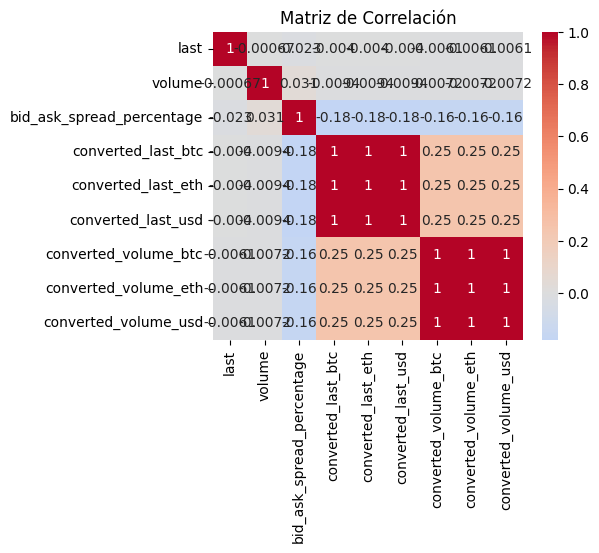

In [103]:
# Crear un heatmap utilizando seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

#### Producto ticker_df:

In [104]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [105]:
tickers_resume.head(10)

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,opul,usdt,0.075240,1.890682e+06,green,0.516556,2023-08-22 19:52:01,2023-08-22 19:52:01,2023-08-22 19:52:01,False,False,https://www.kucoin.com/trade/opul-usdt,not founded token_info_url #404,opulous,tether,kucoin,kucoin,0.000003,0.000046,0.075217,5.502457,87.280000,142211.00
1,opul,usdt,0.075430,3.696710e+05,green,1.065473,2023-08-22 19:52:04,2023-08-22 19:52:04,2023-08-22 19:52:04,False,False,https://www.bitmart.com/trade/en?layout=basic&symbol=opul_usdt,not founded token_info_url #404,opulous,tether,bitmart,bitmart,0.000003,0.000046,0.075499,1.079890,17.129122,27910.00
2,opul,usdt,0.075400,2.626204e+05,green,0.398936,2023-08-22 19:44:33,2023-08-22 19:44:33,2023-08-22 19:53:58,False,False,https://www.huobi.com/en-us/exchange/opul_usdt,not founded token_info_url #404,opulous,tether,huobi,huobi,0.000003,0.000046,0.075409,0.754182,11.964504,19476.33
3,opul,usdt,0.075276,3.156425e+06,green,0.524934,2023-08-22 19:52:57,2023-08-22 19:52:57,2023-08-22 19:52:57,False,False,https://gate.io/trade/opul_usdt,not founded token_info_url #404,opulous,tether,gate.io,gate,0.000003,0.000046,0.075345,8.893310,141.065000,229848.00
4,opul,eth,0.000046,7.863833e+04,green,1.594181,2023-08-22 19:52:57,2023-08-22 19:52:57,2023-08-22 19:52:57,False,False,https://gate.io/trade/opul_eth,not founded token_info_url #404,opulous,ethereum,gate.io,gate,0.000003,0.000046,0.075402,0.215969,3.425682,5581.72
5,opul,usdt,0.075250,7.410871e+05,green,0.809341,2023-08-22 19:52:24,2023-08-22 19:52:24,2023-08-22 19:52:24,False,False,https://www.mexc.com/exchange/opul_usdt,not founded token_info_url #404,opulous,tether,mexc,mxc,0.000003,0.000046,0.075319,2.159711,34.257159,55818.00
6,opul,usdt,0.076200,1.896505e+06,green,3.329065,2023-08-22 19:51:51,2023-08-22 19:51:51,2023-08-22 19:51:51,False,False,https://ascendex.com/en/cashtrade-spottrading/usdt/opul,not founded token_info_url #404,opulous,tether,ascendex (bitmax),bitmax,0.000003,0.000047,0.076181,5.589826,88.628000,144478.00
7,opul,usdt,0.074744,8.880632e+04,green,0.555080,2023-08-22 19:53:56,2023-08-22 19:53:56,2023-08-22 19:53:56,False,False,https://www.coinex.com/trading?currency=usdt&dest=opul#limit,not founded token_info_url #404,opulous,tether,coinex,coinex,0.000003,0.000046,0.074753,0.249729,3.961750,6449.10
8,opul,usdt,0.075860,5.998548e+04,green,0.487540,2023-08-22 19:54:09,2023-08-22 19:54:09,2023-08-22 19:54:09,False,False,https://tarmex.io/trade/opul_usdt,not founded token_info_url #404,opulous,tether,tarmex,tarmex,0.000003,0.000047,0.075862,0.167267,2.652342,4319.18
9,0x80d55c03180349fff4a229102f62328220a96444,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0.076616,2.723416e+05,yellow,0.603821,2023-08-22 17:32:12,2023-08-22 17:32:12,2023-08-22 19:53:18,False,False,https://app.uniswap.org/#/swap?inputcurrency=0x80d55c03180349fff4a229102f62328220a96444&outputcurrency=0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,https://v2.info.uniswap.org/token/0x80d55c03180349fff4a229102f62328220a96444,opulous,usd-coin,uniswap v2 (ethereum),uniswap_v2,0.000003,0.000047,0.076629,0.786986,12.484913,20323.00


### normalized ticker_df for ML then

In [106]:
# Seleccionar solo las columnas numéricas
numeric_columns = tickers_resume.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

In [107]:
numeric_columns.head()

,last,volume,bid_ask_spread_percentage,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,0.075240,1.890682e+06,0.516556,0.000003,0.000046,0.075217,5.502457,87.280000,142211.00
1,0.075430,3.696710e+05,1.065473,0.000003,0.000046,0.075499,1.079890,17.129122,27910.00
2,0.075400,2.626204e+05,0.398936,0.000003,0.000046,0.075409,0.754182,11.964504,19476.33
3,0.075276,3.156425e+06,0.524934,0.000003,0.000046,0.075345,8.893310,141.065000,229848.00
4,0.000046,7.863833e+04,1.594181,0.000003,0.000046,0.075402,0.215969,3.425682,5581.72


In [108]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max al DataFrame
normalized_numeric_columns = scaler.fit_transform(numeric_columns)

# Crear un nuevo DataFrame normalizado
normalized_df = pd.DataFrame(normalized_numeric_columns, columns=numeric_columns.columns)

In [109]:
normalized_df.head()

,last,volume,bid_ask_spread_percentage,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,9.016371e-10,1.800115e-09,0.081009,0.000003,0.000003,0.000003,0.000204,0.000204,0.000205
1,9.039140e-10,3.519631e-10,0.168794,0.000003,0.000003,0.000003,0.000040,0.000040,0.000040
2,9.035545e-10,2.500404e-10,0.062199,0.000003,0.000003,0.000003,0.000028,0.000028,0.000028
3,9.020685e-10,3.005227e-09,0.082349,0.000003,0.000003,0.000003,0.000330,0.000330,0.000331
4,5.544997e-13,7.487142e-11,0.253346,0.000003,0.000003,0.000003,0.000008,0.000008,0.000008


##### Guardo normalized_tickers_resume.csv

In [110]:
normalized_df.to_csv('../Csvs_cleanned/normalized_tickers_resume.csv', index=False, mode='w',header=True)

### 🌎📊 Global Eecentralized Finance(defi) data: # Aún no utiliazda...
Code	Description
defi_market_cap	
Defi Market Capitalization in USD

eth_market_cap	
Ethereum Market Capitalization in USD

defi_to_eth_ratio	
defi_market_cap to eth_market_cap ratio

trading_volume_24h	
defi trading volume in 24h in USD

defi_dominance	
defi_market_cap to total_market_cap ratio

top_coin_name	
defi coin with largest market_cap

top_coin_dominance	
top defi coin market dominance

In [111]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global/decentralized_finance_defi"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_ecentralized_data = response.json()
        list_of_global_ecentralized_data = pd.DataFrame(global_ecentralized_data)
        return list_of_global_ecentralized_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_ecentralized_data = get_coin_list()
    if list_of_global_ecentralized_data is not None:
        print(list_of_global_ecentralized_data)


                                                                            data
defi_dominance             3.794237316867082825957962494371543983039417141986275
defi_market_cap                                    40899225175.35849771701879712
defi_to_eth_ratio        20.9389312475006764827947321833578568015982670617460338
eth_market_cap                                   195326230799.102185020314238552
top_coin_defi_dominance                                                 33.06702
top_coin_name                                                  Lido Staked Ether
trading_volume_24h                               1421185294.96885649520400150278


### notas: En un futuro me gustaria agregar webscraping, para lectura de diarions, novedades paginas con valor agregado en informacion sobre los mercados, no solo de criptomonedas si no tambien del mundo global, acciones de empresas, bonos estatales, por ejemplo..

_________________________________________